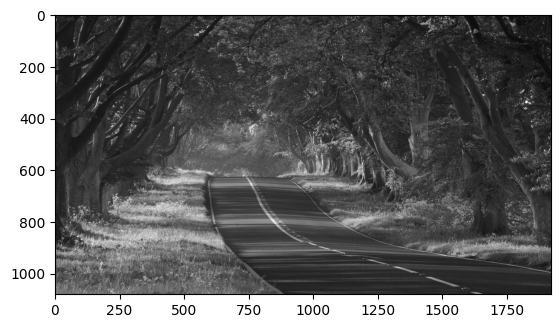

In [283]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import dct, idct

img = cv2.imread('imgs/highway.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')

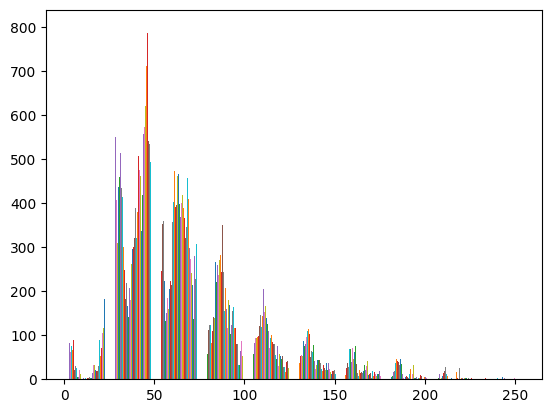

In [284]:
plt.hist(img)
plt.show()

# DCT

(array([[0.000e+00, 5.000e+00, 9.390e+02, ..., 1.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 1.800e+01, 1.061e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.000e+00, 7.000e+00, 1.069e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [0.000e+00, 0.000e+00, 1.080e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 0.000e+00, 1.080e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 0.000e+00, 1.080e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 array([-555.95526692, -320.07224023,  -84.18921353,  151.69381316,
         387.57683985,  623.45986654,  859.34289323, 1095.22591992,
        1331.10894662, 1566.99197331, 1802.875     ]),
 <a list of 1920 BarContainer objects>)

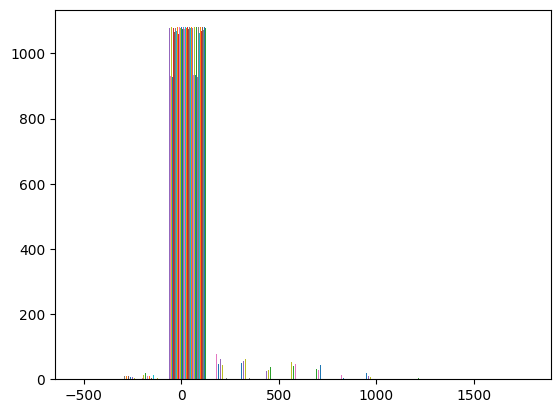

In [285]:
Y = np.zeros(img.shape)

U = img.shape[0]//8
V = img.shape[1]//8

for u in range(U):
    for v in range(V):
        img_blck = img[u*8: u*8 + 8, v*8: v*8 + 8]
        Y[u*8: u*8 + 8, v*8: v*8 + 8] = dct(dct(img_blck, axis=0, norm='ortho'), axis=1, norm='ortho')


# plt.imshow(Y, cmap='gray')
plt.hist(Y)

# Quantizando

In [286]:
quantization = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99],
])


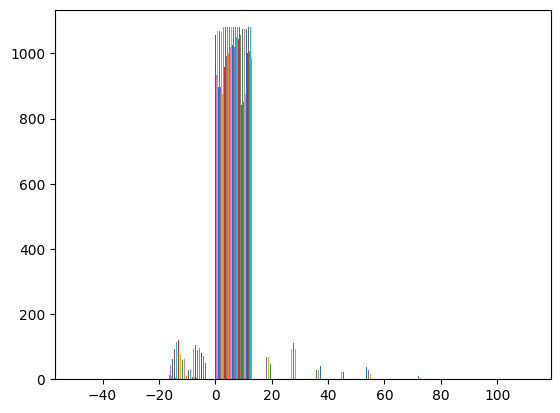

In [287]:
Y_quant = np.zeros(img.shape)

for u in range(U):
    for v in range(V):
        Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8] = Y[u*8 : u*8 + 8, v*8 : v*8 + 8] / quantization
        Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8] *= np.abs(Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8]) >= .1


plt.hist(Y_quant)
plt.show()

In [288]:
Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8]

array([[17.        , -0.68886027, -0.4596184 ,  0.        ,  0.        ,
        -0.        ,  0.        , -0.        ],
       [-0.67953895, -0.62430895, -0.        , -0.        ,  0.        ,
         0.        ,  0.        , -0.        ],
       [-0.30213679, -0.        ,  0.        ,  0.        , -0.        ,
         0.        , -0.        , -0.        ],
       [ 0.        , -0.        ,  0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        ],
       [ 0.375     ,  0.        , -0.        , -0.        , -0.        ,
        -0.        ,  0.        ,  0.        ],
       [-0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.        ,  0.        ],
       [-0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.        , -0.        , -0.        ],
       [-0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.        , -0.        ,  0.        ]])

In [289]:
# Qual melhor filtro para a img quantizada ???
u = v = 0
((np.abs(Y_quant) > 0.1).sum() , (np.abs(Y_quant) != 0).sum(), Y.size)



(741925, 741925, 2073600)

# Desquantizando

(array([[0.000e+00, 5.000e+00, 9.390e+02, ..., 1.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 1.800e+01, 1.061e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.000e+00, 7.000e+00, 1.069e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [0.000e+00, 0.000e+00, 1.080e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 0.000e+00, 1.080e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 0.000e+00, 1.080e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 array([-555.95526692, -320.07224023,  -84.18921353,  151.69381316,
         387.57683985,  623.45986654,  859.34289323, 1095.22591992,
        1331.10894662, 1566.99197331, 1802.875     ]),
 <a list of 1920 BarContainer objects>)

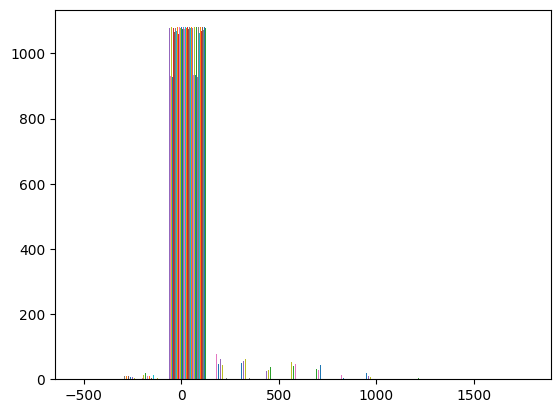

In [290]:
for u in range(U):
    for v in range(V):
        Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8] = Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8] * quantization

plt.hist((Y_quant))

(array([[0.000e+00, 5.000e+00, 9.390e+02, ..., 1.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 1.800e+01, 1.061e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.000e+00, 7.000e+00, 1.069e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [0.000e+00, 0.000e+00, 1.080e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 0.000e+00, 1.080e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 0.000e+00, 1.080e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 array([-555.95526692, -320.07224023,  -84.18921353,  151.69381316,
         387.57683985,  623.45986654,  859.34289323, 1095.22591992,
        1331.10894662, 1566.99197331, 1802.875     ]),
 <a list of 1920 BarContainer objects>)

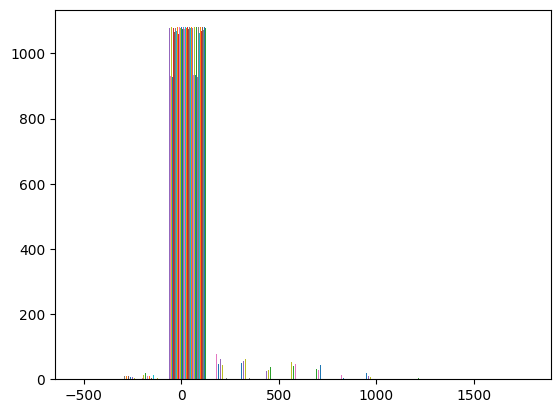

In [291]:
plt.hist(Y)

In [292]:
(np.abs(Y - Y_quant)).sum()/Y.size

0.14694849569224222

In [293]:
img_rec = np.zeros(img.shape)
for u in range(U):
    for v in range(V):
        img_rec[u*8 : u*8 + 8, v*8 : v*8 + 8] = idct(idct(Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8], axis=0, norm='ortho'), axis=1, norm='ortho')


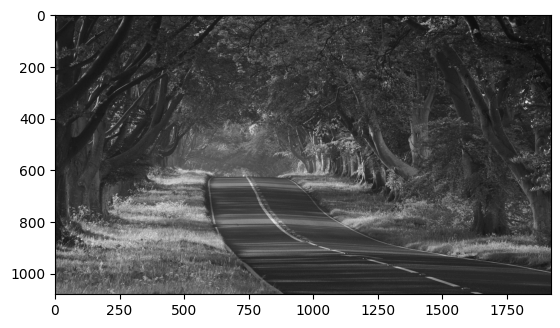

In [294]:
plt.imshow((img_rec), cmap='gray')

# Comparação de imagens


In [295]:
plt.hist(img)

(array([[118., 619., 167., ...,   0.,   0.,   0.],
        [108., 628., 169., ...,   1.,   0.,   0.],
        [100., 633., 163., ...,   1.,   2.,   0.],
        ...,
        [200., 530., 242., ...,   0.,   0.,   0.],
        [206., 532., 236., ...,   0.,   0.,   0.],
        [218., 514., 258., ...,   1.,   0.,   0.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 1920 BarContainer objects>)

(array([[676., 155., 144., ...,   0.,   0.,   0.],
        [677., 156., 143., ...,   0.,   0.,   0.],
        [678., 156., 144., ...,   0.,   0.,   0.],
        ...,
        [752., 156., 144., ...,   0.,   0.,   0.],
        [754., 156., 144., ...,   0.,   0.,   0.],
        [755., 156., 144., ...,   0.,   0.,   0.]]),
 array([ 28.75414316,  52.15185406,  75.54956496,  98.94727586,
        122.34498676, 145.74269767, 169.14040857, 192.53811947,
        215.93583037, 239.33354127, 262.73125217]),
 <a list of 1920 BarContainer objects>)

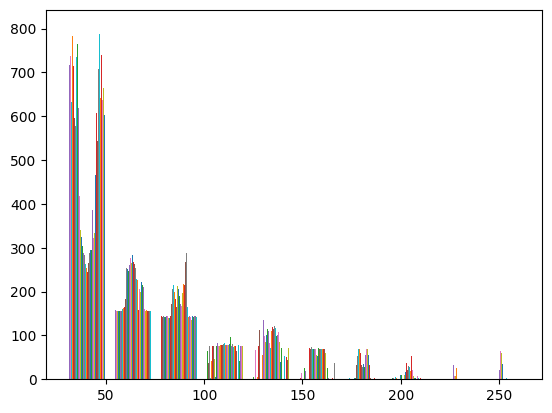

In [ ]:
plt.hist(img_rec)